In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
import matplotlib.animation as animation

In [17]:
def wave1(x, t):
    return np.cos(t - x) + np.cos(1.2 * t - 1.2 * x)


f1 = 20
f2 = 50
k1 = f1
k2 = f2


def wave2(x, y, t):
    return (np.cos(2 * np.pi * f1 * t - np.sqrt((2 * np.pi * k1 * (x - 50)) ** 2 + (2 * np.pi * k1 * (y - 50)) ** 2))
            + np.cos(2 * np.pi * f2 * t - np.sqrt(
                (2 * np.pi * k2 * (x - 50)) ** 2 + (2 * np.pi * k2 * (y - 50)) ** 2))) / 2 * np.exp(-t)


def wave3(x, y, t):
    return np.sin(2 * np.pi * t - np.sqrt((2 * np.pi * (x - 50)) ** 2 + (2 * np.pi * (y - 50)) ** 2)) / np.exp(-t)

In [39]:
fs = 100  # sampling frequency, (Hz)
dx = 1  # spatial sampling step along X in (mm)
dy = 1  # spatial sampling step along Y in (mm)
X = np.arange(0, 100, dx)
Y = np.arange(0, 100, dy)
T = np.arange(0, 5, 1 / fs)
# x, y, t = np.meshgrid(X, Y, T)
x, y = np.meshgrid(X, Y)
# z = wave2(x, y, t)
z = np.zeros((len(X), len(Y), len(T)))
for t in range(len(T)):
    z[:, :, t] = wave2(x, y, t)

In [40]:
x_max = z.shape[0]
x_max

100

In [41]:
y_max = z.shape[1]
y_max

100

In [42]:
t_max = z.shape[2]
t_max

500

C:\Users\parad1se\anaconda3\envs\waves\lib\site-packages\matplotlib\animation.py:889: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


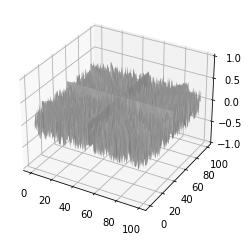

In [43]:
# data = {'x': x.flatten(), 'y': y.flatten(), 't': t.flatten(), 'z': z.flatten()}
# df = pd.DataFrame(data)
# fig = px.scatter_3d(df, 'x', 'y', 'z', animation_frame='t', range_z=(-2, 2))
# fig.update_traces(marker_size=1)
# fig.update_yaxes(
#     scaleanchor="x",
#     scaleratio=1,
# )
#
# fig.show()

def change_plot(frame_number, zarray, plot):
    plot[0].remove()
    plot[0] = ax.plot_surface(x, y, zarray[:, :, frame_number], cmap="afmhot_r")


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plot = [ax.plot_surface(x, y, z[:, :, 1], color='0.75', rstride=1, cstride=1)]
ax.set_zlim(-1, 1)
fps = 75
ani = animation.FuncAnimation(fig, change_plot, len(T), fargs=(z, plot), interval=1000 / fps)
plt.show()

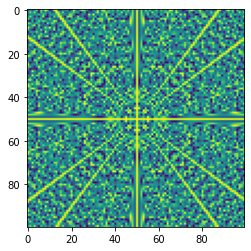

In [44]:
def change_plot_img(frame_number, z_array, plot):
    plot[0].remove()
    plot[0] = ax.imshow(z_array[:, :, frame_number], cmap='viridis')


fig2 = plt.figure()
ax = fig2.add_subplot()
image = [ax.imshow(z[:, :, 0], cmap='viridis')]
ani2 = animation.FuncAnimation(fig2, change_plot_img, len(T), fargs=(z, image), interval=1000 / fps)
plt.show()

(100, 100, 500)


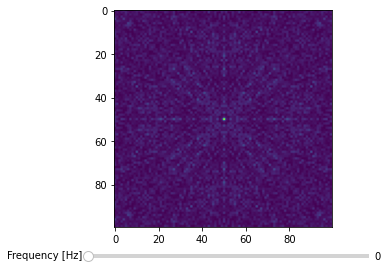

In [45]:
x, y, t = np.meshgrid(X, Y, T)
z = wave2(x, y, t)
fft_wave2 = np.abs(np.fft.fftshift(np.fft.fftn(z), axes=(0, 1)))
print(fft_wave2.shape)

KX = np.linspace(-x_max / 2, x_max / 2, z.shape[0])
KY = np.linspace(-y_max / 2, y_max / 2, z.shape[1])
FREQ = np.linspace(0, fs, z.shape[2])
kx, ky, freq = np.meshgrid(KX, KY, FREQ)

fig3 = plt.figure()
ax = fig3.add_subplot()
image_fft = ax.imshow(fft_wave2[:, :, 0], cmap='viridis')
ax_freq = plt.axes([0.20, 0.01, 0.65, 0.03])
freq_slider = Slider(
    ax=ax_freq,
    label='Frequency [Hz]',
    valmin=0,
    valmax=fft_wave2.shape[2],
    valinit=0,
)


def update(val):
    ax.imshow(fft_wave2[:, :, int(val)], cmap='viridis')
    fig3.canvas.draw_idle()


freq_slider.on_changed(update)
plt.show()

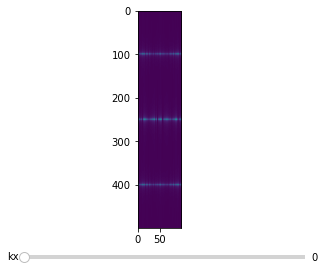

In [46]:
fig4 = plt.figure()
ax = fig4.add_subplot()
image_fft_kx = ax.imshow(fft_wave2[0, :, :].T, cmap='viridis')
ax_kx = plt.axes([0.20, 0.01, 0.65, 0.03])
kx_slider = Slider(
    ax=ax_kx,
    label='kx',
    valmin=0,
    valmax=fft_wave2.shape[0],
    valinit=0,
)


def update_kx(val):
    ax.imshow(fft_wave2[int(val), :, :].T, cmap='viridis')
    fig4.canvas.draw_idle()


kx_slider.on_changed(update_kx)
plt.show()

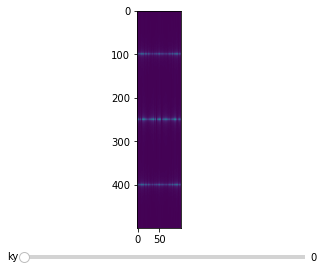

In [47]:
fig5 = plt.figure()
ax = fig5.add_subplot()
image_fft_ky = ax.imshow(fft_wave2[:, 0, :].T, cmap='viridis')
ax_ky = plt.axes([0.20, 0.01, 0.65, 0.03])
kx_slider = Slider(
    ax=ax_ky,
    label='ky',
    valmin=0,
    valmax=fft_wave2.shape[1],
    valinit=0,
)


def update_ky(val):
    ax.imshow(fft_wave2[int(val), :, :].T, cmap='viridis')
    fig5.canvas.draw_idle()


kx_slider.on_changed(update_ky)
plt.show()